<img src = "assets/bricks.jpg">

In [6]:
import pandas as pd
df = pd.read_csv("data/colors.csv")
df["name"].nunique()

135

In [7]:
df["name"][df["is_trans"] == "t"].count()

28

In [8]:
df["name"][df["is_trans"] == "f"].count()

107

In [9]:
df["is_trans"].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

In [10]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


# Understanding LEGO Themes vs. LEGO Sets
Walk into a LEGO store and you will see their products organised by theme. THeir themes include Star Wars, Batman, Harry Potter and many more.
<img src = "assets/lego_themes.png">
<hr>

### A lego **set** is a particular box of LEGO or prodcut. Therefore, a single them typically has have many different sets.
<img src = "assets/lego_sets.png">

In [11]:
sets = pd.read_csv("data/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [12]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


In [13]:
sets.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [14]:
sets[sets["year"] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [15]:
sets.sort_values("num_parts", ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
1782,20216-1,MBA Robot & Micro Designer (Kits 2 - 3 Redesign),2013,432,0
1780,20214-1,MBA Adventure Designer (Kits 7 - 9 Redesign),2013,432,0
6822,5005539-1,Brick Pouch (Yellow),2018,501,0
9026,66319-1,Power Miners 3 in 1 Superpack,2009,439,0


In [30]:
sets_by_year = sets.groupby("year").count()
sets_by_year["set_num"]

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

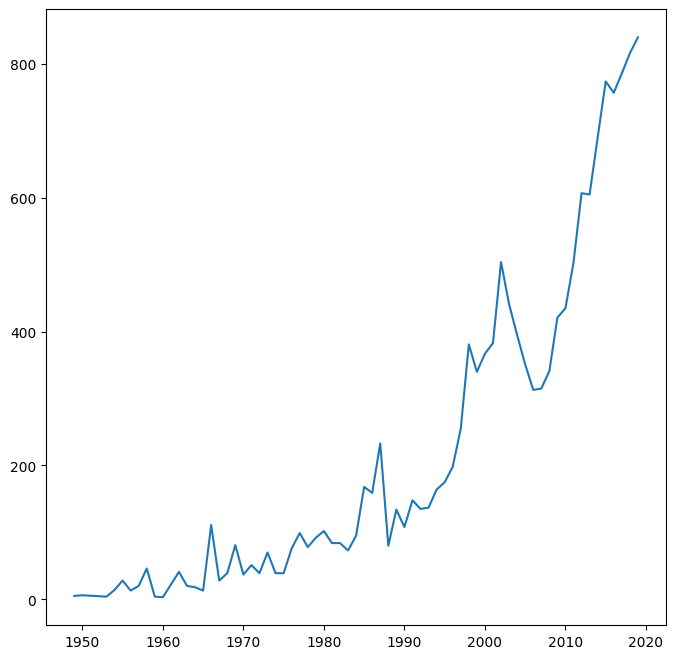

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(sets_by_year["set_num"][:len(sets_by_year["set_num"])-2])

In [47]:
themes_by_year = sets.groupby("year").agg({"theme_id" : pd.Series.nunique} )
themes_by_year.rename(columns= {"theme_id":"nr_themes"}, inplace= True)
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


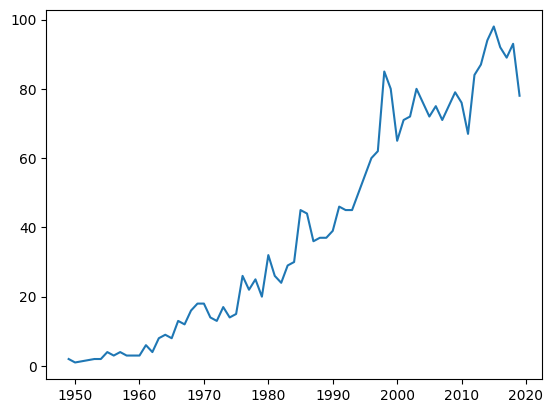

In [51]:
plt.plot(themes_by_year[:-2])

Text(0, 0.5, 'Number of Themes')

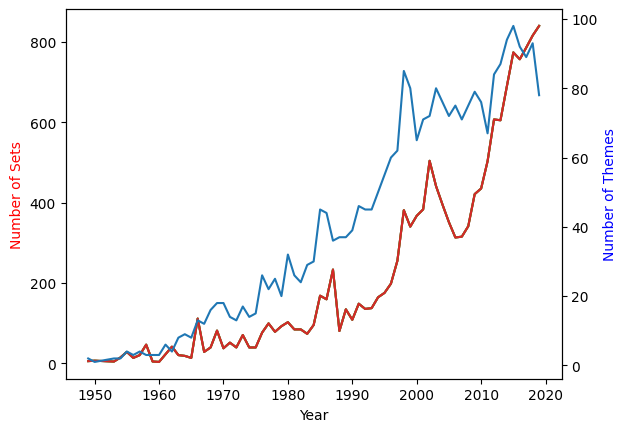

In [54]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

ax1.plot(sets_by_year[:-2])
ax2.plot(themes_by_year[:-2])

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color = "red" )
ax2.set_ylabel("Number of Themes", color = "blue")

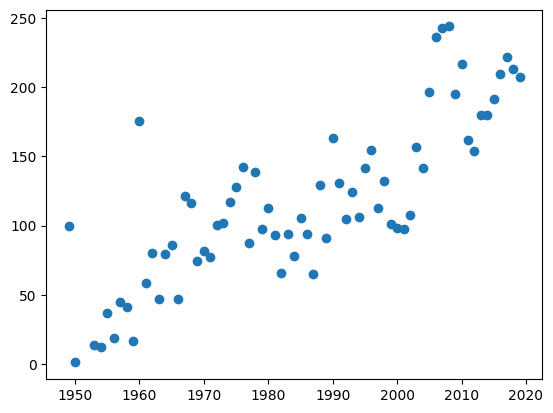

In [66]:
parts_per_set = sets.groupby("year").agg({"num_parts": pd.Series.mean})
#parts_per_set.head()
plt.scatter(x = parts_per_set.index[:-2], y = parts_per_set.num_parts[:-2])

In [68]:
sets.theme_id.value_counts().head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [82]:
themes = pd.read_csv("data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [89]:
themes[themes.name == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [94]:
sets[sets.theme_id == 209].sort_values("year")

,set_num,name,year,theme_id,num_parts
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312


In [107]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [108]:
set_theme_count = pd.DataFrame({
    "id":set_theme_count.index,
    "set_count":set_theme_count.values
})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [109]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

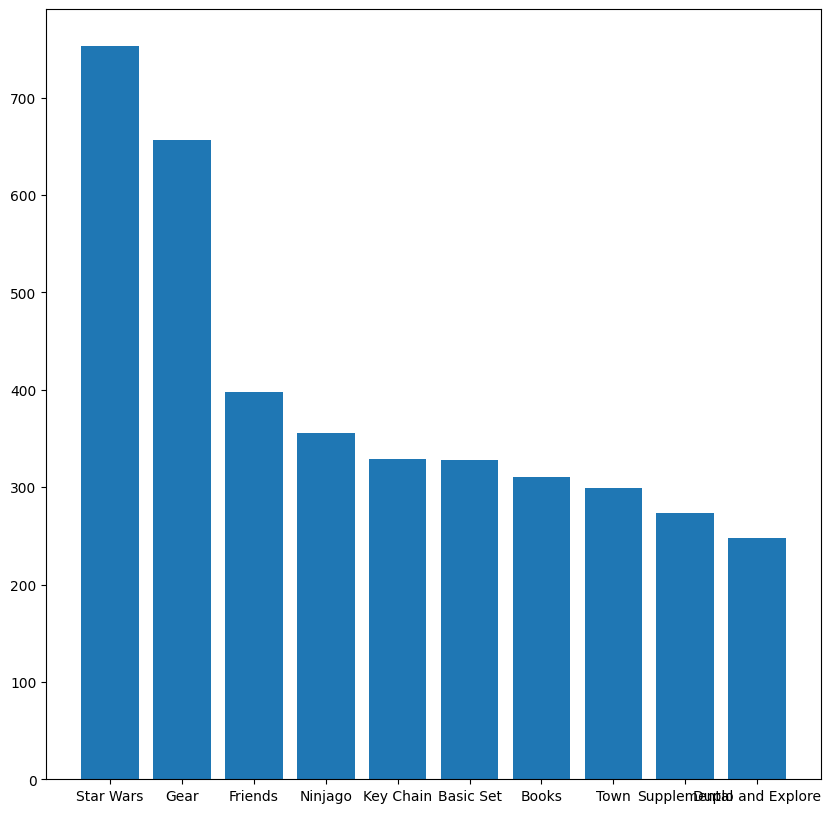

In [113]:
plt.figure(figsize=(10, 10))
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

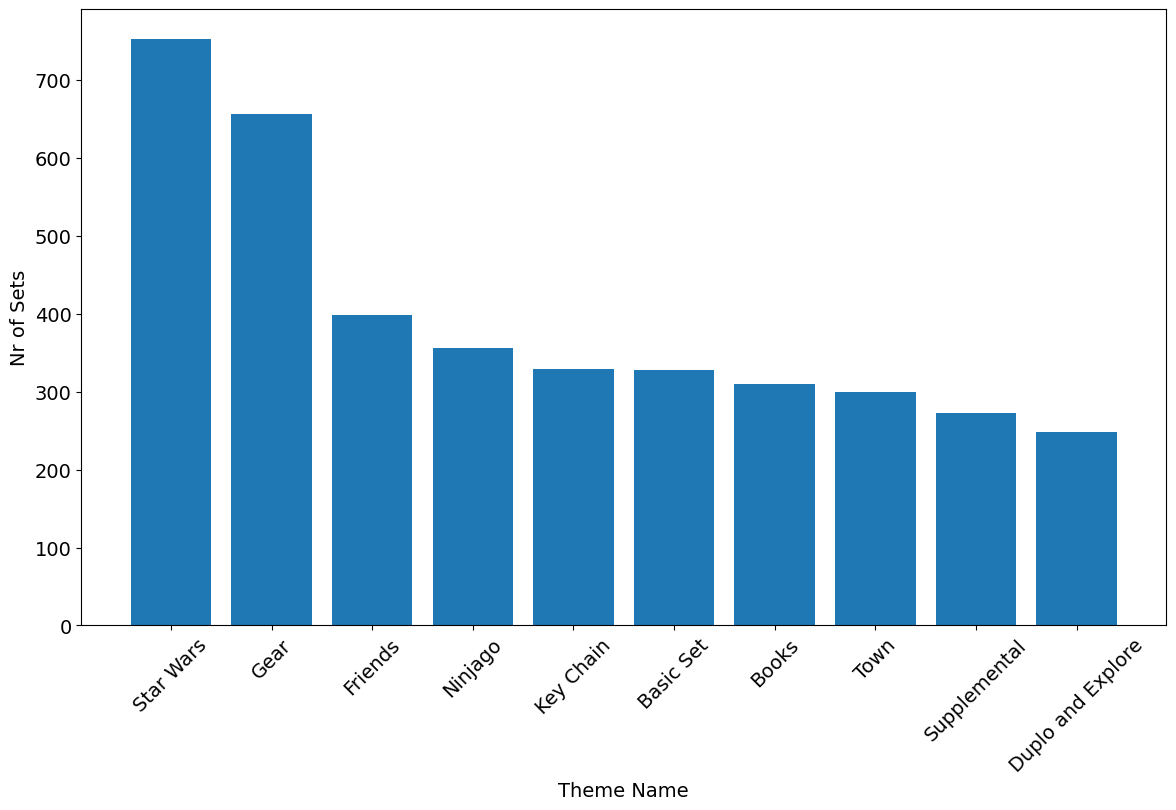

In [114]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])